### **Reto Empresarial- Ejercicio Fashion-MNIST Modelo preentrenado - Daniel Afanador**

In [3]:
!unzip fashion-mnist.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: fashion-mnist/test/0/2423.png  
  inflating: fashion-mnist/test/0/444.png  
  inflating: fashion-mnist/test/0/965.png  
  inflating: fashion-mnist/test/0/1460.png  
  inflating: fashion-mnist/test/0/3440.png  
  inflating: fashion-mnist/test/0/2795.png  
  inflating: fashion-mnist/test/0/2474.png  
  inflating: fashion-mnist/test/0/169.png  
  inflating: fashion-mnist/test/0/1647.png  
  inflating: fashion-mnist/test/0/2121.png  
  inflating: fashion-mnist/test/0/2163.png  
  inflating: fashion-mnist/test/0/2753.png  
  inflating: fashion-mnist/test/0/645.png  
  inflating: fashion-mnist/test/0/34.png  
  inflating: fashion-mnist/test/0/716.png  
  inflating: fashion-mnist/test/0/3874.png  
  inflating: fashion-mnist/test/0/3128.png  
  inflating: fashion-mnist/test/0/2180.png  
  inflating: fashion-mnist/test/0/2439.png  
  inflating: fashion-mnist/test/0/269.png  
  inflating: fashion-mnist/test/0/2027.pn

In [24]:
#--- Buscamos las direcciones de cada archivo de imagen
from glob import glob

train_files = glob('./fashion-mnist/train/*/*.png')
test_files = glob('./fashion-mnist/test/*/*.png')

train_files[0]

'./fashion-mnist/train/0/18240.png'

In [25]:
#--- Ordenamos los datos de forma aleatoria para evitar sesgos
import numpy as np

np.random.shuffle(train_files)
np.random.shuffle(test_files)

len(train_files), len(test_files)

(55000, 5000)

In [26]:
#--- Debido a problemas en la memoria RAM, se utilizará solo un porcentaje de 
#--- los datos de entrenamiento y de testeo para minimizzar el tiempo de ejecución.
#--- Usamos la siguiente función, que ya fue empleada en la quinta entrega.
import random
def cambiarSize(files,N,perc):
  new_size = random.sample(range(N),int(N*perc/100))
  files_prime = []
  for i in new_size:
    files_prime.append(files[i])
  return files_prime

In [27]:
#--- Cambiamos el tamaño de los datos de entrenamiento y testeo a solo un 10% del tamaño original.
train_files = cambiarSize(train_files,len(train_files),10)
test_files = cambiarSize(test_files,len(test_files),10)

In [28]:
len(train_files), len(test_files)

(5500, 500)

In [29]:
import torchvision.transforms as transforms

#--- Transformamos los datos para adaptarlos a la entrada de ResNet 224x224 px
data_transform = transforms.Compose([
                 transforms.Resize((224, 224)),
                 transforms.Grayscale(3), #Dado que MNIST tiene un solo canal, lo cambiamos a 3 para no tener que modificar más capas en el modelo
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                 ])

In [30]:
#--- Cargamos los datos de entrenamiento en listas
from PIL import Image

N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
  Y_train.append( int(train_file.split('/')[3]) )
  X_train.append(np.array(data_transform(Image.open(train_file))))

In [31]:
#--- Cargamos los datos de testeo en listas
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
  Y_test.append( int(test_file.split('/')[3]) )
  X_test.append(np.array(data_transform(Image.open(test_file))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


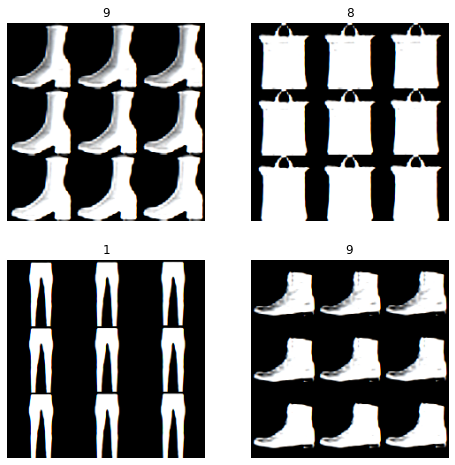

In [32]:
#-- Visualizamos los datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(X_test[i*15].reshape(224,224,3))
  plt.title(Y_test[i*15])
  plt.axis(False)
plt.show()

In [33]:
#--- Convetimos las listas de datos a tensores de torch
import torch
from torch.autograd import Variable


X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([5500, 3, 224, 224])

In [34]:
#-- Creamos el DataLoader

import torch

batch_size = 32

train_ds = torch.utils.data.TensorDataset(X_train, Y_train)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [15]:
#--- Seleccionamos y cargamos el modelo Alexnet
import torch

model = torch.hub.load('pytorch/vision', 'alexnet', pretrained=True)
model

Downloading: "https://github.com/pytorch/vision/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Para nuestro modelo CNN, consideramos un modelo Alexnet. Alexnet tiene 3 capas generales, donde *Sequential* tiene 13 capas, *AvgPool2d* tiene 1 capa, y *Classifier* tiene 7 capas. Alexnet toma una imagen $3 \times 224 \times 224$ y devuelve, antes de la última capa de salida, una imagen caracterizada por los parámetros $13 \times 13 \times 256$. Se optó por usar este modelo en tanto que fue diseñado para el dataset **Imagenet**, por lo que, dentro del análisis de imágenes y de varias de sus características, esta CNN resulta apropiada para el entrenamiento y la identificación precisa del las imágenes del dataset fashion-mnist.

In [56]:
#--- Congelamos los pesos en las capaz del modelo para que no se actualicen.
for p in model.parameters():
    p.requires_grad = False

#--- Definimos el número de clases del dataset fashion-mnist.
out_dim = 10

#--- Reescribimos la nueva capa de salida adaptada al dataset de fashion-mnist.
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=9216, out_features=2048, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=2048, out_features=2048, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Linear(in_features=2048, out_features=10, bias=True)

)


model.load_state_dict(model.state_dict())

model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=2048, bias=True)
 

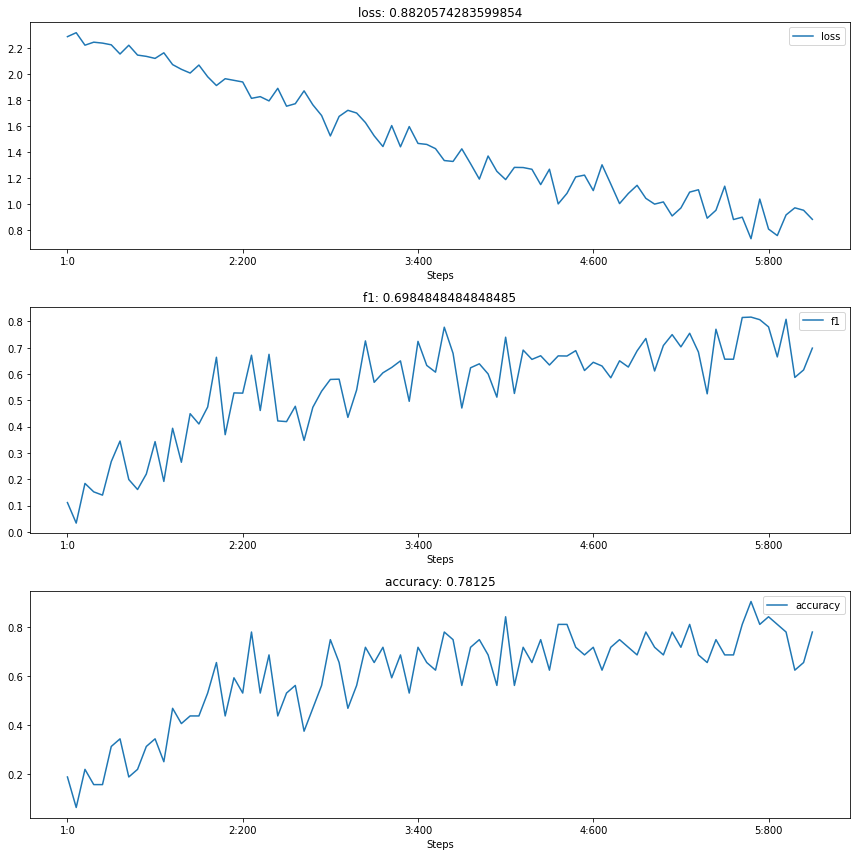

In [57]:
#--- Creamos variables para almacenar los scores en cada época 
from sklearn.metrics import f1_score
model = model.cuda()

model.train()

#--- Definimos nuestro criterio de evaluación y el optimizador 
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.1)
criterion = torch.nn.CrossEntropyLoss()


#--- Entrenamos el modelo usando únicamente 5 épocas
n_epochs = 5

history = hl.History()
canvas = hl.Canvas()

iter = 0

for epoch in range(n_epochs):
  for batch_idx, (X_train_batch, Y_train_batch) in enumerate(train_dl):
    # Pasamos os datos a 'cuda'
    
    X_train_batch = X_train_batch.cuda()
    Y_train_batch = Y_train_batch.cuda()

    # Realiza una predicción
    Y_pred = model(X_train_batch)

    # Calcula el loss
    loss = criterion(Y_pred, Y_train_batch)

    Y_pred = torch.argmax(Y_pred, 1)

    # Calcula el accuracy
    acc = sum(Y_train_batch == Y_pred)/len(Y_pred)
    f1 = f1_score(Y_train_batch.cpu(),Y_pred.cpu(), average='macro')
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if iter%10 == 0:
        #-- Visualizamos la evolución de los score loss y accuracy
        history.log((epoch+1, iter),f1=f1, loss=loss, accuracy=acc)
        with canvas:
          canvas.draw_plot(history["loss"])
          canvas.draw_plot(history["f1"])
          canvas.draw_plot(history["accuracy"])

    iter += 1
    del X_train_batch, Y_train_batch, Y_pred

## Notamos que el score **loss** disminuye progresivamente a lo largo del número de épocas, por lo que el modelo no pierde gran parte de la información que ha aprendido y comprende en buena medida, de sus épocas pasadas, formas de identificar las imágenes del dataset. No obstante, los scores **f1** y **accuracy** no son muy altos, de manera que el modelo presenta ciertas fallas para identificar cierto tipo de imágenes, pero estos puntajes son lo suficientemente grandes como para que la CNN interprete las imágenes de **fashion-mnist** con buena precisión.

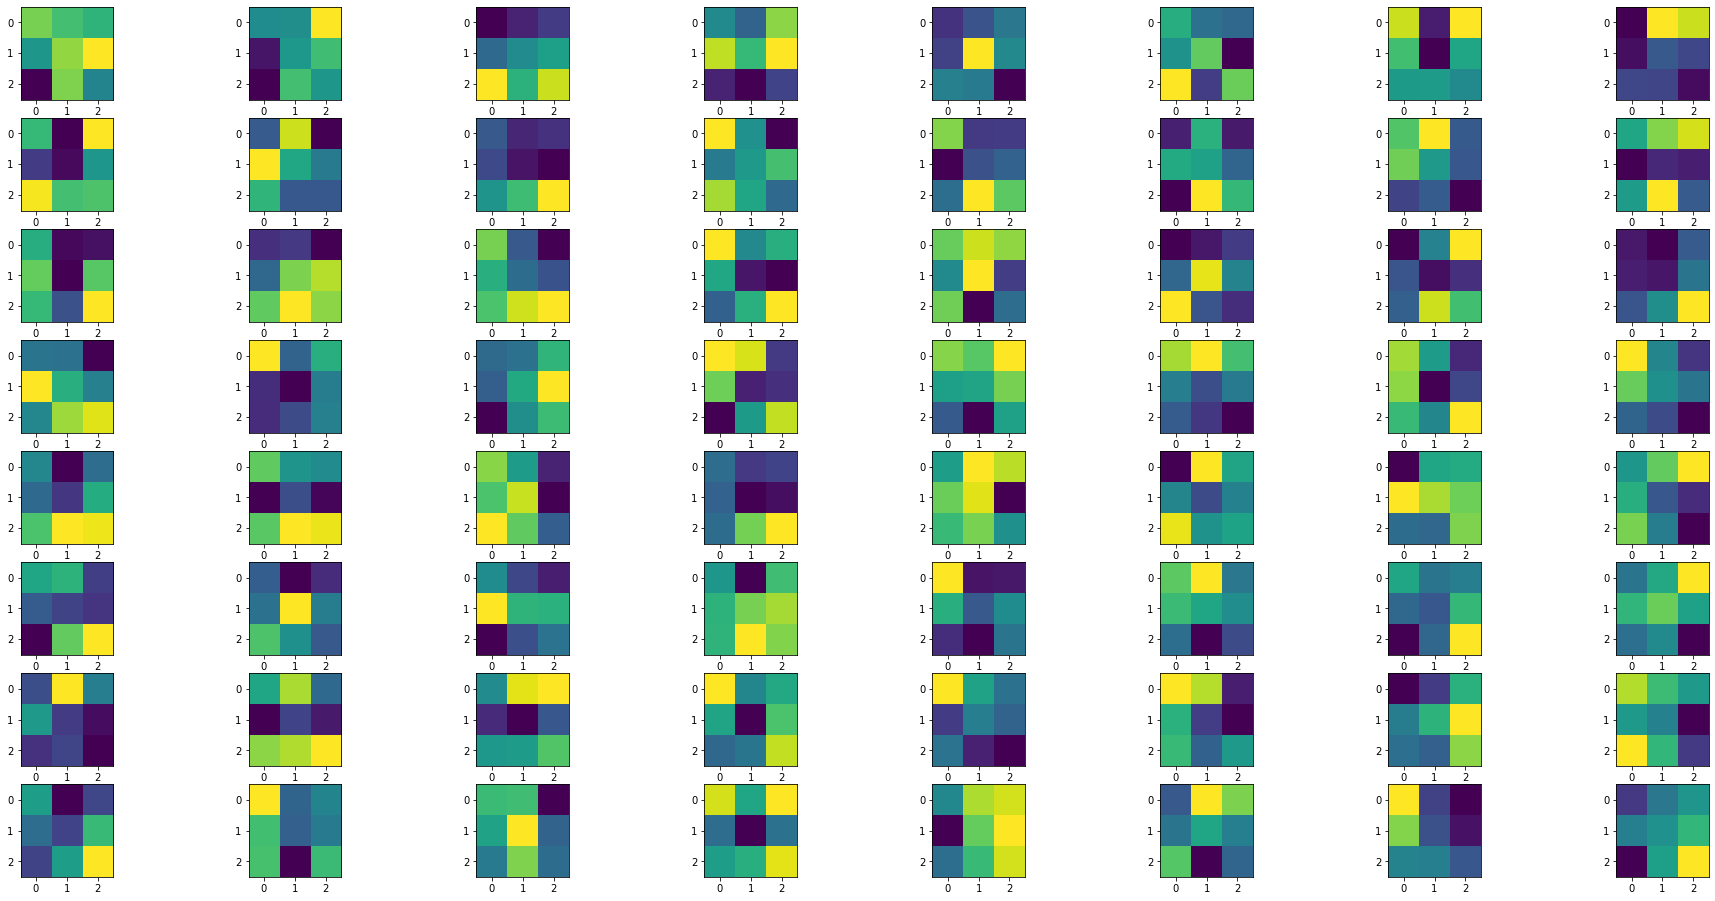

In [58]:
#-- Visualizamos los mapas de características de la última capa convolucional. Se observan las primeras 64 imágenes de esta capa convolucional.

kernels = list(model.children())[0][8].weight.detach()

fig = plt.figure(figsize=(32,16))
k = 0

for i in range(kernels.size(0)):
  if(k>=64):
    break
  plt.subplot(8,8,k+1)
  plt.imshow(kernels[i][0].cpu().squeeze())
  k += 1
plt.show()

In [59]:
#-- Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix

def CM(Y_true, Y_pred, classes):
  fig = plt.figure(figsize=(10, 10))
  cm = confusion_matrix(Y_true, Y_pred)
  lclasses = np.arange(0,classes)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmap=plt.cm.Blues
  ax = fig.add_subplot(1,1,1)
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.86)
  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=lclasses, yticklabels=lclasses)
  ax.set_xlabel("Predicted",size=20)
  ax.set_ylabel("True",size=20)
  ax.set_ylim(classes-0.5, -0.5)

  plt.setp(ax.get_xticklabels(), size=12)
  plt.setp(ax.get_yticklabels(), size=12)

  fmt = '.2f'
  thresh = cm.max()/2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=15 , color="white" if cm[i, j] > thresh else "black")

  plt.show()

In [60]:
#--- Guardamos el nuevo Modelo
torch.save(model,open('./AlexNet_MNIST.pt','wb'))

In [61]:
#-- Validamos el modelo CNN por medio del set de testeo.

X_test, Y_test = X_test.cuda(), Y_test.cuda()
model=model.cuda()
model.eval()
Xvl = X_test
Y_pred = model(Xvl)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test.cpu(), Y_pred.cpu(), average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print( 'Loss:{:.2f}, F1:{:.2f}, Acc:{:.2f}'.format(loss.item(), f1, acc ) )

Loss:0.71, F1:0.78, Acc:0.80


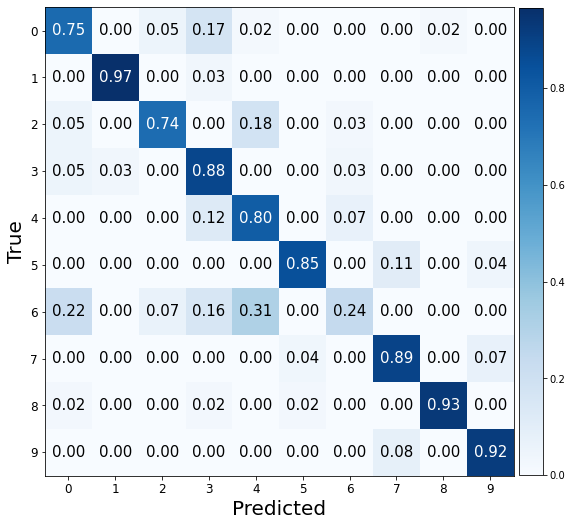

In [48]:
CM(Y_test.cpu(), Y_pred.cpu(), 10)

## Tras haber hecho una breve descripción del modelo CNN preentrenado Alexnet, la razón de su escogencia, y ver algunas de sus características, usamos el set de testeo para ver como los scores y la matriz de confusión determinan el "performance" de este modelo. De manera semejante a como se observó en las anteriores gráficas, la pérdida final es considerable, pero es lo sufcientemente baja como para comprender que Alexnet ha identificado correctamente los items de fashion. De forma análoga, en los scores de *f1* y *acc*, que son cercanos a 0.8, por lo que su actuación puede ser calificada como "buena" para crear una predicción coherente con el set de testeo.

## La matriz de confusión nos permite detallar a mayor profundidad las debilidades de Alexnet. La CNN presenta dificultades para diferenciar un item 6 (camisa) en relación a los items 0 (camisetas), los items 2 (suéteres) y a los items 4 (abrigos), lo cual muestra cierta coherencia con las dificultades que tendría un ser humano a la hora de diferenciar estas prendas. Por lo demás, la matriz de confusión nos confirma que nuestro modelo identifica y diferencia muy bien los demás items. 